<a href="https://colab.research.google.com/github/Allanx495/Allanx495/blob/main/Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Coffee Sales Analysis Project!
###Objective:
- To explore a simple coffee shop dataset, by applying predictive modeling and visualization techniques for insightful business analysis.


---
###Summary:

- In this project we have done an EDA of a coffee store sales dataset, that was imported from Kaggle.
- Applied machine learning models to identify trends and generate predictive insights
- Project findings and file description are at the end of this notebook




In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_shop_revenue.csv')
df.head()

Mounted at /content/drive


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [2]:
# Data Cleaning
Coffee_cleaning = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_shop_revenue.csv')
Coffee_cleaning.isna().any()


,0
Number_of_Customers_Per_Day,False
Average_Order_Value,False
Operating_Hours_Per_Day,False
Number_of_Employees,False
Marketing_Spend_Per_Day,False
Location_Foot_Traffic,False
Daily_Revenue,False


In [3]:
df.tail()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21
1999,89,6.88,13,14,78.46,322,914.24


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None


In [5]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


In [6]:
# Dropping function just to be 100% sure there is no logner any dupes.
df.drop_duplicates(inplace = True)
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


In [7]:
# Changing the column names for better readiblity
df = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_shop_revenue.csv')
df.head()
# Making a copy with a new name to call back more efficiently
df2_df = df.copy()

df2_tidy = df2_df.rename(
    columns={
        'Number_of_Customers_Per_Day': 'Customer_p_day',
        'Average_Order_Value': 'avg_order_value',
        'Operating_Hours_Per_Day': 'OP_hrs',
        'Number_of_Employees': 'Employee_Count',
        'Marketing_Spend_Per_Day': 'Marketing$_Pday',
        'Location_Foot_Traffic': 'Customer_Traffic',
        }, inplace=False)
df2_tidy.head()

,Customer_p_day,avg_order_value,OP_hrs,Employee_Count,Marketing$_Pday,Customer_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [8]:
# Getting a sense of the highest amount of employees the store has
df2_tidy.query('Employee_Count >= 10')

,Customer_p_day,avg_order_value,OP_hrs,Employee_Count,Marketing$_Pday,Customer_Traffic,Daily_Revenue
10,264,7.60,13,14,318.08,885,2099.66
12,137,8.15,10,14,29.11,505,1367.08
16,201,2.72,16,10,417.87,385,876.02
17,180,8.69,17,14,495.90,656,2167.08
19,358,5.01,15,13,348.97,806,2463.86
...,...,...,...,...,...,...,...
1988,89,8.67,14,10,45.46,441,815.09
1990,273,6.58,7,10,119.40,678,1792.47
1991,367,4.00,14,11,461.93,667,2075.30
1998,403,9.41,7,12,452.49,577,4266.21


In [9]:
df2_tidy.query('Employee_Count >= 14')

,Customer_p_day,avg_order_value,OP_hrs,Employee_Count,Marketing$_Pday,Customer_Traffic,Daily_Revenue
10,264,7.60,13,14,318.08,885,2099.66
12,137,8.15,10,14,29.11,505,1367.08
17,180,8.69,17,14,495.90,656,2167.08
24,435,6.31,16,14,129.37,589,2580.95
43,100,7.66,8,14,456.98,627,1177.41
...,...,...,...,...,...,...,...
1927,96,7.80,17,14,408.04,524,855.88
1929,226,4.85,17,14,379.12,507,1656.48
1952,447,7.54,6,14,46.05,638,2974.57
1981,451,8.00,11,14,383.40,165,3720.50


In [10]:
# We can see by this snippet that the max # of employees the shop can have is 14 per day.
df2_tidy.query('Employee_Count >= 15')

,Customer_p_day,avg_order_value,OP_hrs,Employee_Count,Marketing$_Pday,Customer_Traffic,Daily_Revenue


In [11]:
# check the range of employees for the store
df2_tidy['Employee_Count'].value_counts()
Number_of_Em = df2_tidy['Employee_Count'].value_counts().index.tolist()
Number_of_Em



[11, 8, 3, 14, 2, 7, 5, 6, 4, 9, 10, 13, 12]

In [12]:
# Count how many times they have are in the dataset
Value = df2_tidy['Employee_Count'].value_counts().tolist()
Value

[178, 175, 167, 164, 156, 156, 153, 150, 145, 145, 142, 137, 132]

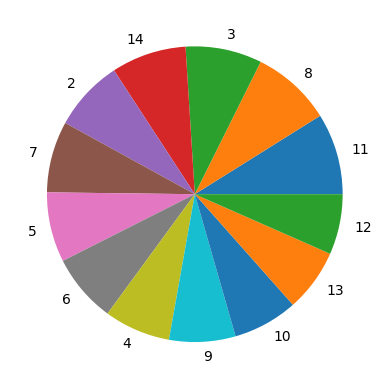

In [13]:
plt.pie(Value, labels=Number_of_Em)
plt.show()

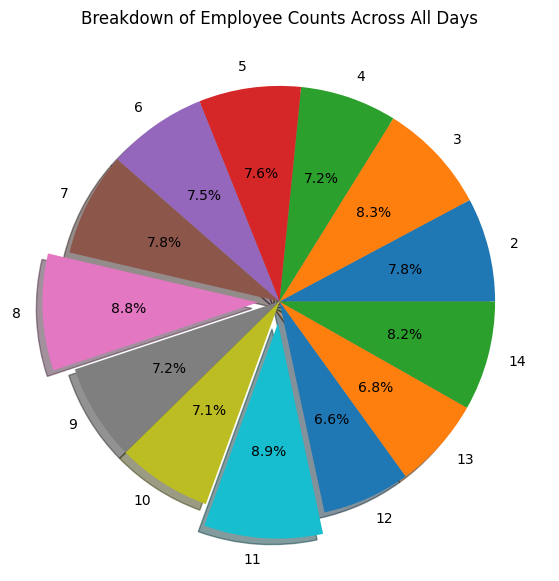

In [17]:
# Original values (in asc order of employee count)
Value = [178, 175, 167, 164, 156, 156, 153, 150, 145, 145, 142, 137, 132]
Number_of_Em = [11, 8, 3, 14, 2, 7, 5, 6, 4, 9, 10, 13, 12]

sorted_pairs = sorted(zip(Number_of_Em, Value))
Number_of_Em_sorted, Value_sorted = zip(*sorted_pairs)

top_values = sorted(Value_sorted, reverse=True)[:2]
myexplode = [0.1 if v in top_values else 0 for v in Value_sorted]

# Pie chart
fig = plt.figure(figsize=(10, 7))
plt.pie(Value_sorted, labels=Number_of_Em_sorted, explode=myexplode, shadow=True, autopct="%1.1f%%")
plt.title("Breakdown of Employee Counts Across All Days")
plt.show()

In [18]:
# Lets compare the columns to find any correlations.
# Correlation Matrix to see the relationship with Customer_p_day and Marketing$_Pday
matrix = np.corrcoef(df2_tidy['Customer_p_day'], df2_tidy['Marketing$_Pday'])
print(matrix)
#Weak correlation

[[1.         0.02718421]
 [0.02718421 1.        ]]


In [19]:
# Correlation Matrix between traffic and revenue
matrix = np.corrcoef(df2_tidy['Customer_Traffic'], df2_tidy['Daily_Revenue'])
print(matrix)
#Weak correlation

[[1.         0.01346857]
 [0.01346857 1.        ]]


In [20]:
#Since both were weak correlations lets try to compare all of the columns

Correlation Matrix:
                             Number_of_Customers_Per_Day  Average_Order_Value  \
Number_of_Customers_Per_Day                     1.000000            -0.014647   
Average_Order_Value                            -0.014647             1.000000   
Operating_Hours_Per_Day                         0.000122            -0.017125   
Number_of_Employees                             0.000346             0.011484   
Marketing_Spend_Per_Day                         0.027184             0.018782   
Location_Foot_Traffic                          -0.000880             0.018151   
Daily_Revenue                                   0.736461             0.535694   

                             Operating_Hours_Per_Day  Number_of_Employees  \
Number_of_Customers_Per_Day                 0.000122             0.000346   
Average_Order_Value                        -0.017125             0.011484   
Operating_Hours_Per_Day                     1.000000            -0.030451   
Number_of_Employees    

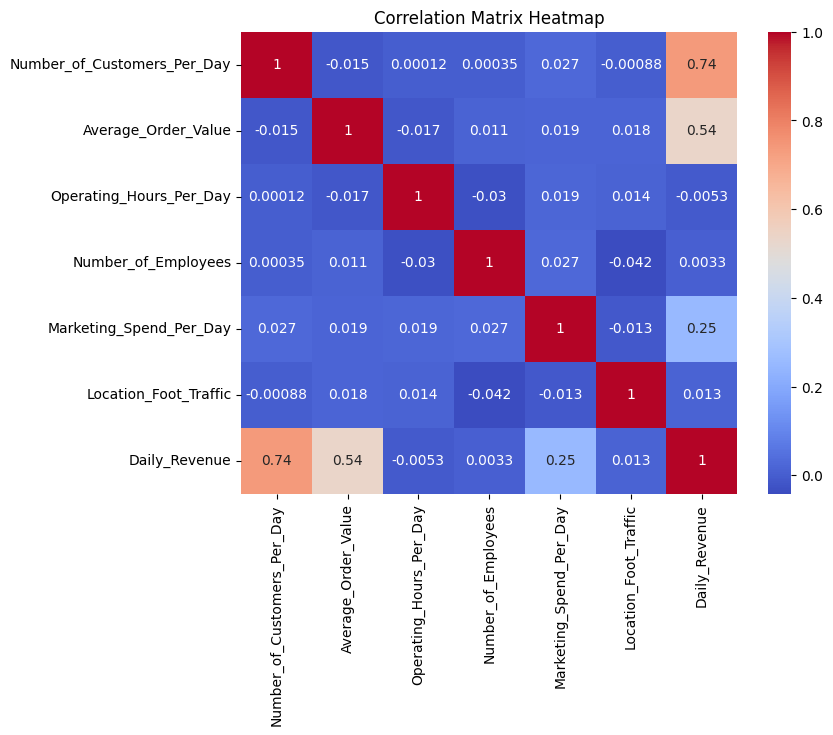

In [21]:
#Created a correlation Matrix for the ENTIRE columns, as you can see results are poor and basically no correlations
corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualized the correlation with a heat map
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [22]:
# Since there wasn't any strong correlations, lets move on to a pivot table.
# In the Pivot table lets find the sweet spot for number of hours vs employees, comparing them to find the average daily revenue.

# Bins for Employees
df['Employees_Bin'] = pd.cut(
    df['Number_of_Employees'],
    bins=[0, 3, 5, 10, np.inf],
    labels=['0-3', '4-5', '6-10', '10+']
)

# Bins for Operating Hours
df['Hours_Bin'] = pd.cut(
    df['Operating_Hours_Per_Day'],
    bins=[0, 5, 8, 12, 24],
    labels=['0-5', '6-8', '9-12', '13-24']
)

# Pivot Table
pivot_binned = pd.pivot_table(
    df,
    index='Employees_Bin',
    columns='Hours_Bin',
    values='Daily_Revenue',
    aggfunc='mean' # Remember, we're finging the AVERAGE, not total.
)

print("Pivot Table (Binned):")
print(pivot_binned)




Pivot Table (Binned):
Hours_Bin              6-8         9-12        13-24
Employees_Bin                                       
0-3            1710.853906  2043.501604  1823.394837
4-5            1919.446119  2159.992952  1881.907063
6-10           1918.623351  1833.405156  1935.354938
10+            1948.376897  1924.976791  1926.500558


<ipython-input-22-7a8c4c996cf7>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_binned = pd.pivot_table(


In [23]:
# How to read the pivot table: When the store has X employees (rows) and is open for Y hours (columns), the average daily revenue is Z.
# e.g., when there are 4-5 workers and the store is open for 9-12 hours, the store has a sweet spot of $2,159 AVERAGE daily rev

In [24]:
# Linear Regression Model

df = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_shop_revenue.csv')


# Setting up the X and Y
y = df['Daily_Revenue']
X = df.drop('Daily_Revenue', axis=1)

# Split into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R²:", r2)

# Compare some predictions vs actual (only the top 10, but can adjust)
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results.head(10))



Linear Regression MSE: 97569.72294013854
Linear Regression R²: 0.895576840810998
       Actual    Predicted
1860  3443.69  3132.437625
353   1021.08  1310.899269
1333  2384.42  2573.161884
905   2198.35  2030.538645
1289  1988.89  2262.575014
1273  1215.53   878.058697
938   1379.93  1294.409458
1731  3729.82  3485.898095
65     986.17   868.893954
1323   942.70   822.020691


In [25]:
# Since the MSE was high lets try another model: The Random Forest Regression Model

# Setting up the X and Y
y = df['Daily_Revenue']
X = df.drop('Daily_Revenue', axis=1)


# train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Initialize and train the Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nRandom Forest MSE:", mse)
print("Random Forest R²:", r2)

# Compare some predictions with actual values (only the top 10, adjust if needed)
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print("\nThe Real Data vs. The Predicted Data:")
print(results.head(10))



Random Forest MSE: 47501.55401971976
Random Forest R²: 0.9491618691981997

The Real Data vs. The Predicted Data:
       Actual  Predicted
1860  3443.69  3436.1342
353   1021.08  1255.3819
1333  2384.42  2057.7390
905   2198.35  2308.4051
1289  1988.89  1642.6834
1273  1215.53  1082.4571
938   1379.93  1224.2068
1731  3729.82  3796.0333
65     986.17  1105.8624
1323   942.70   954.3483


In [26]:
# The Random Forest MSE produced better results, lets see if we can achieve better results with another model...
# Apply Gradient Boosting Regressor for Daily_Revenue prediction

# Make the feature names match the dataframe
features = ["Customer_p_day", "avg_order_value", "OP_hrs",
            "Employee_Count", "Marketing$_Pday", "Customer_Traffic"]
X = df2_tidy[features]
y = df2_tidy["Daily_Revenue"]

# Train/test split (75/25)
SEED = 23
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.25, random_state=SEED
)

# Create the model
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_features=5,
    random_state=100
)
gbr.fit(train_X, train_y)

# Make Predictions
pred_y = gbr.predict(test_X)

# Evaluate Model performance
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Gradient Boosting Regressor MSE:", mse)
print("Gradient Boosting Regressor R^2:", r2)

Gradient Boosting Regressor MSE: 45731.1408769348
Gradient Boosting Regressor R^2: 0.9507668149320354


In [27]:
# The Gradient Boosting Regressor predicted daily revenue with a strong R² of 0.95, capturing 95% of the variance in the target.

In [28]:
import numpy as np
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Predictions are off by ~$213

RMSE: 213.84840629973093


In [29]:
# Now lets try the: Gradient Boosting Classifier
# Convert Daily_Revenue into a binary label (threshold set to $5,000), and use GradientBoostingClassifier to predict that label.

# Define a threshold to split revenue into two classes:
threshold = 5000  # $5,000 of profit per day, can adjust if needed

# Create a new column for classification (1 if revenue >= threshold, else 0)
df2_tidy['Revenue_Class'] = (df2_tidy['Daily_Revenue'] >= threshold).astype(int)

# Separate your features (X) and the new binary target (y)
features = ["Customer_p_day", "avg_order_value", "Employee_Count", "Marketing$_Pday", "Customer_Traffic"]
X = df2_tidy[features]
y = df2_tidy["Revenue_Class"]

# Train/Test split (75/25)
SEED = 23
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.25, random_state=SEED
)

# Create the GradienBoostingClassifier Model
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_features=5,
    random_state=100
)
gbc.fit(train_X, train_y)
pred_y = gbc.predict(test_X)
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier Accuracy:", acc)


Gradient Boosting Classifier Accuracy: 0.998


In [30]:
# The Gradient Boosting Classifier predicted whether daily revenue exceeded a set threshold ($5,000), based on the defined features.
# At a threshold of $5,000, the model achieved 99.8% accuracy, indicating it could almost perfectly identify high-revenue days.

In [31]:
# Same Modle with new threshold: $3,000
# Copying THIS model to make visuals of the feature importance

# Define new threshold
threshold = 3000

df2_tidy['Revenue_Class'] = (df2_tidy['Daily_Revenue'] >= threshold).astype(int)

features = ["Customer_p_day", "avg_order_value", "Employee_Count", "Marketing$_Pday", "Customer_Traffic"]
X = df2_tidy[features]
y = df2_tidy["Revenue_Class"]

# Train/Test split (75/25)
SEED = 23
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.25, random_state=SEED
)

# Create the GradienBoostingClassifier Model
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_features=5,
    random_state=100
)
gbc.fit(train_X, train_y)
pred_y = gbc.predict(test_X)
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier Accuracy:", acc)


Gradient Boosting Classifier Accuracy: 0.956


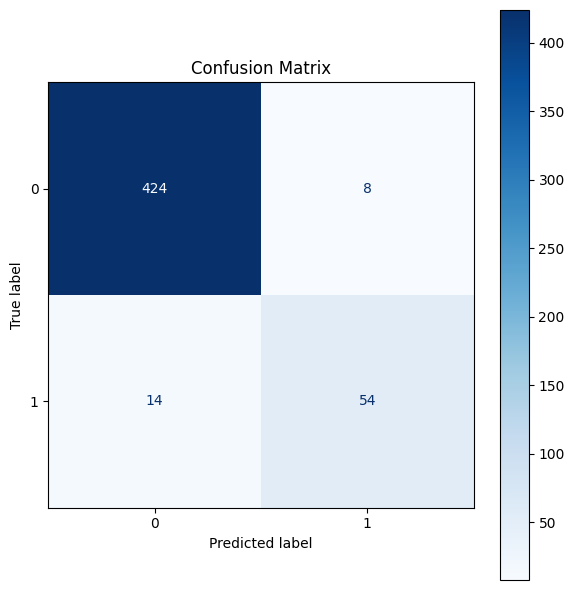

In [32]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [33]:
# How to read the matrix: This confusion matrix helps us understand how well our model performs when classifying whether a day’s revenue exceeds $3,000.
# The top-left value (424) shows how many low-revenue days were correctly identified as low — the model is doing a good job of not overestimating poor-performing days.
# The bottom-right value (54) shows how many high-revenue days were correctly predicted as such — meaning the model can reliably flag strong sales days.
# The small misclassification values (8 and 14) represent cases where the model was slightly off, either predicting too high or too low.
# Key takeaway: With a more balanced threshold like $3,000, the model can now distinguish both high and low-performing days, making it a more reliable tool for planning and forecasting.

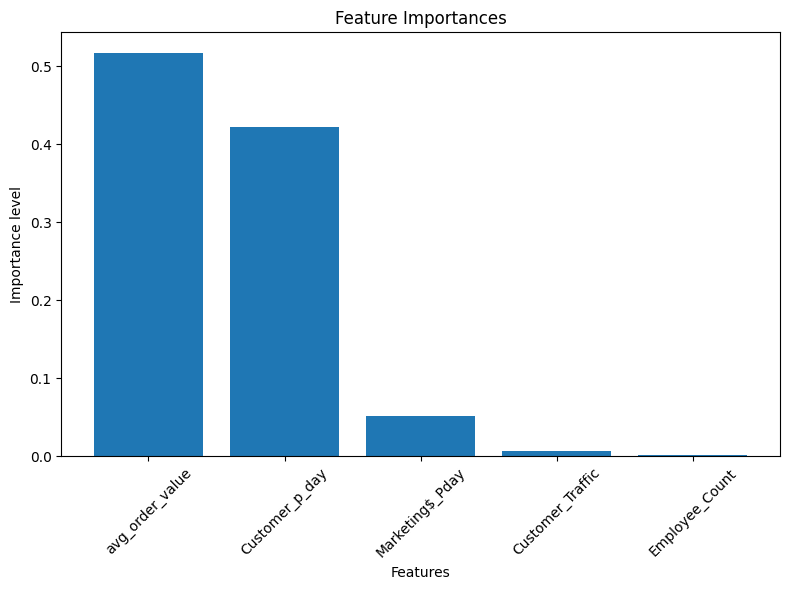

In [34]:
# Feature Importance Bar Chart: This shows which columns have the most importance when predicting the gradient boosting classifier.
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), np.array(features)[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance level")
plt.tight_layout()
plt.show()

In [35]:
# How to read the Bar Chart:
# The most important factor is average order value, meaning that days with higher spending per order are highly indicative of surpassing the $3,000 revenue mark.
# The second most influential feature is customer count per day, which makes sense — more customers typically mean more revenue.
# Marketing efforts and customer traffic had some influence, but were less predictive in this model, suggesting opportunities to either gather better marketing data or refine how we measure those efforts.
# Key takeaway: To drive more consistent high-revenue days, focusing on boosting average order value and customer volume would have the greatest impact, according to the model’s learned behavior.

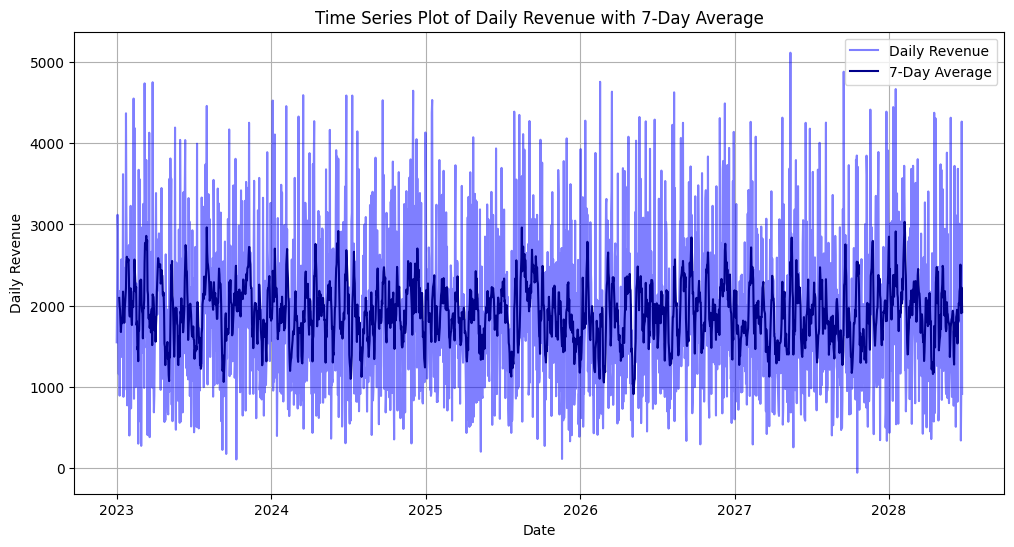

In [39]:


# Assuming 'df' is your DataFrame and it's already set with 'date' as a DateTime index
# Example: df.set_index('date', inplace=True)

# Calculate a 7-day rolling average
df['7_day_avg'] = df['Daily_Revenue'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Revenue'], label='Daily Revenue', color='blue', alpha=0.5)  # Original data in lighter color
plt.plot(df['7_day_avg'], label='7-Day Average', color='darkblue')  # Smoothed data

plt.title('Time Series Plot of Daily Revenue with 7-Day Average')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.legend()
plt.grid(True)
plt.show()

# This time series graph shows daily revenue data alongside a 7-day moving average line.
# The daily revenue is plotted in light blue with transparency, which helps to see overall activity but focuses more on the trend rather than day-to-day changes.

# The dark blue line represents the 7-day moving average of daily revenue.
# This smoothed line helps to clearly identify trends by averaging out the daily fluctuations over each week.
# Observing the moving average line, one can easily notice periods where revenue is generally increasing, stable, or decreasing.

# By comparing the two lines, stakeholders can better understand how typical daily revenues stack up against recent trends.
# This visualization aids in spotting whether any specific days were unusually high or low compared to the general trend of that week.

# The use of a moving average is particularly useful in industries with high day-to-day variability, as it allows for clearer decision-making by highlighting longer-term movements rather than short-term variations.


In [ ]:
# This graph shows daily revenue over time with a 7-day average to smooth out spikes and dips.
# It helps identify overall trends like steady growth, drops, or consistent patterns in revenue.
# Here we’re looking at our daily revenue over time. The lighter line shows the actual day-to-day values, which can be very volatile, while the darker line is a 7-day moving average that smooths out those short-term fluctuations.
# This moving average helps us clearly spot bigger trends — for example, we can quickly see when revenue was trending upward, flatlining, or taking a dip. It's especially useful in our case because our sales vary a lot day to day, and this view gives us a better understanding of performance without getting distracted by one-off spikes or drops.

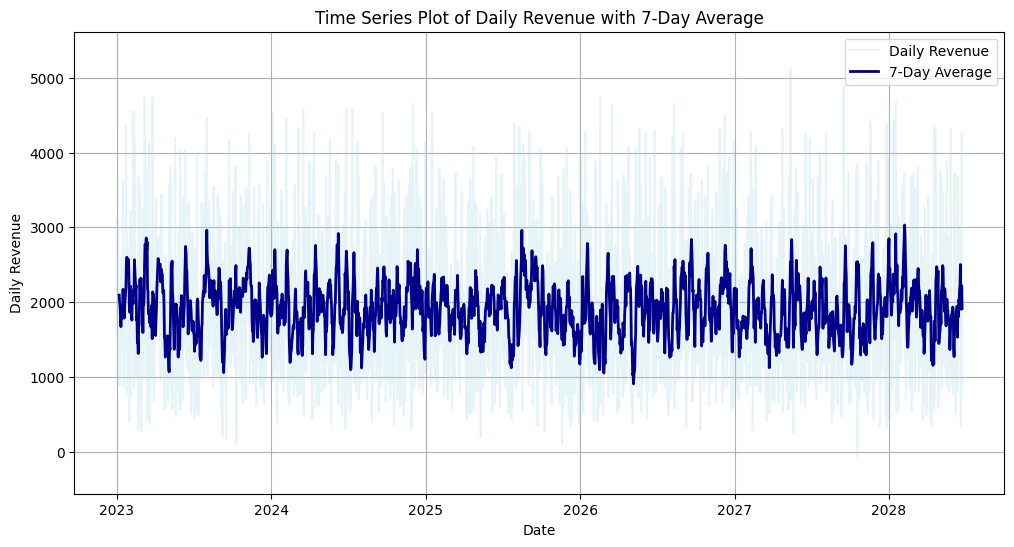

In [40]:
# A more Clear visual of the one on the top
df['7_day_avg'] = df['Daily_Revenue'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Revenue'], label='Daily Revenue', color='lightblue', alpha=0.3)  # Reduced opacity
plt.plot(df['7_day_avg'], label='7-Day Average', color='darkblue', linewidth=2)  # Thicker line

plt.title('Time Series Plot of Daily Revenue with 7-Day Average')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.legend()
plt.grid(True)


plt.ylim([df['Daily_Revenue'].min() - 500, df['Daily_Revenue'].max() + 500])

plt.show()

##1. Pie Chart – Breakdown of Employee Counts Across All Days:
###Objective: To analyze how many employees typically work in stores and identify which employee count appears most frequently across the dataset.
###Findings:
	•	The most common employee counts were 11 and 8, each making up 8.9% and 8.8% of all observations respectively.
	•	Employee count 11 had the most with 8.9%.
	•	Employee count 8 was second with 8.8%.
	•	The lowest 3 employee counts were 12, 13, and 10.
	•	The rest of the employee count values were relatively evenly distributed between 7.2% to 8.3%, showing there isn’t a massive disparity, but clear patterns still exist.

###Business Insight:
From an operations perspective, stores most commonly operate with 10–11 employees, suggesting this may be the ideal number for maintaining efficiency and service quality. On the other hand, if the shop operates with a larger team (13–14 employees) it possibly indicates higher labor costs or lower necessity for larger staff sizes on typical days.

##2. Correlation Matrix and Heatmap Analysis
###Objective:
To identify if any columns had strong relationships with each other, especially to understand what might influence Daily Revenue (e.g., number of customers, marketing spend, or average order value).
###Findings:
	•	The strongest correlation observed was between Number of Customers Per Day and Daily Revenue at 0.74, which makes perfect sense...
	•	Average Order Value also had a moderate correlation with Daily Revenue at 0.54, which also makes perfect sense.
	•	Marketing Spend Per Day showed a weak correlation with revenue (0.25), suggesting that daily marketing spend is not strongly tied to sales in this dataset.
	•	Surprisingly, columns like Location Foot Traffic, Number of Employees, and Operating Hours had almost no correlation with revenue. These were all under 0.05.

###Business Insight:
This correlation analysis revealed two actionable insights: encouraging larger average orders should be the main focus for driving revenue. Meanwhile, areas such as staffing levels and operating hours may not be as influential as expected, at least not in isolation. Marketing efforts may need to be reevaluated or better aligned with customer behavior to become more effective.
##3. Pivot Table – Analyzing the Relationship Between Employee Count, Operating Hours, and Daily Revenue
###Objective:
To determine the optimal number of employees and operating hours that lead to the highest average daily revenue. This helps identify the most efficient staffing and scheduling strategy.
###Findings:
	•	The highest average daily revenue ($2,159) was found when stores had 4-5 employees and were open between 9-12 hours.
	•	The second-best performing setup was 0-3 employees with 9–12 hours of operation, generating approximately $2,043 in average daily revenue.
	•	Interestingly, increasing operating hours beyond 12 (i.e., 13–24 hours) did not significantly improve revenue. In fact, in many cases, it slightly dropped, likely due to diminishing returns or underutilized late hours.

###Business Insight:
There is a sweet spot: having 4-5 employees and keeping the store open for 9–12 hours yields the best average revenue outcomes. This suggests that overscheduling beyond 12 hours does not translate into more revenue and may lead to unnecessary labor costs. Businesses should focus on optimizing only 4-5 workers, during a strong 9–12 hour window to boost performance. We can also see that this coffee shop does not need a lot of employees, and if they can work with only 4, that is their best bet.
##4. Model Comparison for Predicting Daily Revenue
##A. Linear Regression Model
###Objective:
To create a simple regression model that can predict Daily Revenue based on all available variables.
###Findings:
	•	Model performance was moderate, with an R² score of 0.8956, meaning about 89.5% of revenue variability was explained by the model.
	•	The Mean Squared Error (MSE) was relatively high at 97,569, suggesting predictions deviated by several hundred dollars on average.
	•	While good for a baseline, the model occasionally underestimated high-revenue days and overestimated lower ones.

###Business Insight:
This model provided a strong initial framework, but it lacked the precision needed for daily forecasting decisions. It highlighted a need for more sophisticated models.



##B. Random Forest Regressor
###Objective:
To improve prediction accuracy by using an ensemble learning method.
###Findings:
	•	The model improved performance, with an R² score of 0.9491, capturing 94.9% of revenue variability.
	•	MSE dropped to 47,501, showing the model made much more accurate predictions than Linear Regression model.
	•	The predicted values were consistently close to actual sales, even for higher revenue days.

###Business Insight:
Random Forest proved far more effective at learning complex patterns in the data, making it a highly dependable model for revenue forecasting. It’s ideal for automated business reporting or sales predictions.



##C. Gradient Boosting Regressor
###Objective:
To fine-tune forecasting using a model that learns from errors in sequence for better precision.
###Findings:
	•	Only slightly outperformed Random Forest with an R² of 0.9508 and an MSE of 45,731.
	•	After taking the square root of the MSE, we found that predictions were on average within ±$213, which is a strong result given the wide range of revenue in the data.

###Business Insight:
This model offered the highest prediction accuracy, making it the best candidate for forecasting daily revenue. Businesses could confidently use this to estimate future performance and plan resources accordingly.



##5. Gradient Boosting Classifier – Predicting High-Revenue Days
###Objective:
To predict whether or not a store would earn above a specific revenue threshold using classification, rather than continuous prediction.
###Threshold 1: $5,000

	•	The model achieved a 99.8% accuracy, almost perfectly predicting whether a day would exceed $5,000 in revenue.
  This high accuracy indicates that the input features (customer volume, average order value, employee count, marketing, and customer traffic) are good variables for the model.

###Threshold 2: $3,000
	•	Even at this lower threshold, the model maintained strong performance with a 95.6% accuracy.

###Business Insight:
This classifier is ideal for daily business planning, for example: determining which days to boost staff, increase marketing, or offer promotions. Managers can use it as a yes/no signal to anticipate peak revenue days and plan accordingly.

##6. Confusion Matrix Revenue Classification
Objective:
To evaluate how well the Gradient Boosting Classifier distinguishes high-revenue days `(≥ $3,000)` from lower-revenue days `(< $3,000)`. Set threshold to $3,000.

###Findings:
	•	The model correctly predicted 424 low-revenue days (True Negatives) and 54 high-revenue days (True Positives).
	•	There were only 8 False Positives (predicted high, but were low) and 14 False Negatives (predicted low, but were high).
	•	This leads to a very high accuracy score of 95.6%.

###Business Insight:
The classifier performs reliably at a `$3,000` revenue threshold, effectively flagging both high-performing and underperforming days. The low number of misclassifications makes this a very useful tool for strategic planning, staffing, and inventory decisions—especially on days expected to cross that `$3,000` mark.



##7. Feature Importance:
(What Drives Revenue Classification at `$3,000`Threshold)

###Objective:
To understand which features the Gradient Boosting Classifier relied on most when predicting whether a day would exceed $3,000 in sales.
##Findings:
	•	The most important factor was Average Order Value, accounting for over half of the model’s predictive power. This suggests that how much each customer spends plays the biggest role in determining high-revenue days; which makes perfect sense…
	•	The second most influential factor was Customer Count per Day, reinforcing the importance of volume + value.
	•	Marketing Spend, Customer Traffic, and Employee Count had very minimal impact, which could either indicate weak influence or the need for better tracking methods.

##Business Insight:
To drive more consistent $3,000+ revenue days, businesses should prioritize strategies that increase order value (like upselling or bundling) and boost customer traffic. Marketing may still play a role, but its low predictive weight here shows it's either not effective enough yet, or its impact is being captured through other variables like customer count.

##8. Time Series Plot of Daily Revenue with 7-Day Rolling Average (Graph 1)
###Objective:
To observe long-term trends in daily revenue using a time series visualization, with a 7-day moving average to reduce daily volatility and highlight bigger patterns.
###Findings:
	•	The light blue line represents raw daily revenue, which varies significantly each day due to natural fluctuations.
	•	The dark blue line overlays a 7-day average, smoothing out spikes and dips to make patterns easier to detect.
	•	We can visually identify periods of growth, stability, or decline in revenue more clearly using this moving average.

###Business Insight:
This visualization provides valuable insight into revenue trends without getting distracted by extreme day-to-day changes. It helps identify when overall sales performance is rising, falling, or stabilizing, which is key for monitoring the business's health and seasonal impacts.



##9. Enhanced Clarity – Cleaned Time Series with Emphasis on 7-Day Average (Graph 2)
###Objective:
To create a more visually readable version of the previous time series plot by lowering the opacity of raw daily revenue and making the 7-day average stand out more clearly.
###Findings:
	•	The darker, thicker line representing the 7-day average is now easier to follow, helping business stakeholders quickly grasp broader performance trends without being overwhelmed by raw data.
	•	The lightened daily revenue line still provides context but doesn’t overpower the moving average line visually.
	•	This version is ideal for presentations where the goal is to emphasize trend direction rather than daily detail.







In [ ]:
# Dataset Overview

# This dataset contains 2,000 rows of data from coffee shops, offering detailed insights into factors that influence daily revenue. It includes key operational and environmental variables that provide a comprehensive view of how business activities and external conditions affect sales performance. Designed for use in predictive analytics and business optimization, this dataset is a valuable resource for anyone looking to understand the relationship between customer behavior, operational decisions, and revenue generation in the food and beverage industry.

# Columns & Variables

# The dataset features a variety of columns that capture the operational details of coffee shops, including customer activity, store operations, and external factors such as marketing spend and location foot traffic.

# Number of Customers Per Day

# The total number of customers visiting the coffee shop on any given day.
# Range: 50 - 500 customers.
# Average Order Value ($)

# The average dollar amount spent by each customer during their visit.
# Range: $2.50 - $10.00.
# Operating Hours Per Day

# The total number of hours the coffee shop is open for business each day.
# Range: 6 - 18 hours.
# Number of Employees

# The number of employees working on a given day. This can influence service speed, customer satisfaction, and ultimately, sales.
# Range: 2 - 15 employees.
# Marketing Spend Per Day ($)

# The amount of money spent on marketing campaigns or promotions on any given day.
# Range: $10 - $500 per day.
# Location Foot Traffic (people/hour)

# The number of people passing by the coffee shop per hour, a variable indicative of the shop's location and its potential to attract customers.
# Range: 50 - 1000 people per hour.